# Introduction to the Perceptron Algorithm

## Overview

The Perceptron algorithm is one of the simplest and earliest forms of artificial neural networks. It was developed in the 1950s and 1960s by Frank Rosenblatt and is a fundamental building block for understanding more complex neural networks. The Perceptron is a binary classifier that maps input features to an output label (0 or 1) using a decision boundary.

## Key Concepts

### Neuron Model

At the heart of the Perceptron algorithm is a simple computational model of a neuron, which consists of:

1. **Inputs (Features)**: The Perceptron receives multiple input signals (features) represented as a vector.
2. **Weights**: Each input is associated with a weight, which adjusts the input's importance.
3. **Activation Function**: The weighted sum of inputs is passed through an activation function to produce the output. For the Perceptron, this is typically a step function that outputs 1 if the sum is greater than or equal to a threshold (usually 0), and 0 otherwise.

### Activation Function

The activation function for the Perceptron is usually defined as:

\begin{cases} 
1 & \text{if } \sum_{i=1}^n (w_i \cdot x_i) \geq 0 \\
0 & \text{otherwise}
\end{cases}

where $w_i$ are the weights and $ x_i $ are the input features.


#### Remark
The Perceptron algorithm presented in this notebook is a computationally optimized variant that is introduced in Patterns by Hardt and Recht. This version improves efficiency by reducing the computational complexity of weight updates, making it faster and more suitable for large datasets.
 
### Learning Algorithm

The Perceptron learning algorithm is an iterative process that adjusts the weights based on the errors in the predictions. The key steps include:

1. **Initialization**: Start with random weights.
2. **Prediction**: Compute the output using the current weights.
3. **Error Calculation**: Calculate the difference between the predicted and actual outputs.
4. **Weight Update**: Adjust the weights to minimize the error using the learning rate (\( \eta \)).

The weight update rule is given by:
$$ w_i = w_i + \eta \cdot (y - \hat{y}) \cdot x_i $$
where $ y $ is the actual label, $ \hat{y} $ is the predicted label, and $ x_i $ is the input feature.

### Training Process

The training process involves multiple iterations (epochs) over the entire training dataset. During each epoch, the algorithm updates the weights based on the errors for each training example.

## Advantages and Limitations

### Advantages

- **Simplicity**: The Perceptron algorithm is easy to understand and implement.
- **Efficiency**: It is computationally efficient for binary classification problems.
- **Foundation**: It serves as a foundation for more complex neural network models.

### Limitations

- **Linearly Separable Data**: The Perceptron can only converge if the data is linearly separable. For non-linearly separable data, it may fail to find a suitable decision boundary.
- **Binary Classification**: The basic Perceptron is limited to binary classification tasks. Extensions like the Multi-layer Perceptron (MLP) can handle multi-class problems.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import seaborn as sns
sns.set_style('darkgrid')

In [45]:
def random_points(n, x=0, y=0, r=1):
    """
    Generate n random points centered around (x, y).

    Parameters:
    n (int): Number of points
    x (float): X-coordinate of the center
    y (float): Y-coordinate of the center
    r (float): Radius for scaling the points

    Returns:
    np.ndarray: Array of shape (n, 2) with generated points
    """
    points = []
    for i in range(n):
        a = np.random.normal()
        b = np.random.normal()
        p = [a, b]
        points.append(p)
    points = np.array(points) 
    points = r * points + [x, y]
    return points

# Make a prediction with weights
def predict(row, weights):
    """
    Predict the class label for a single row of input data using the given weights.

    Args:
    row (list or array-like): Input data row.
    weights (list or array-like): Model weights.

    Returns:
    float: Predicted class label (0 or 1).
    """
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0


# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    """
    Train the Perceptron weights using stochastic gradient descent.

    Args:
    train (list of lists or array-like): Training dataset.
    l_rate (float): Learning rate.
    n_epoch (int): Number of training epochs.

    Returns:
    Trained weights.
    """
    all_weights = []
    weights = [0.0 for _ in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += l_rate * error
            for i in range(len(row) - 1):
                weights[i + 1] += l_rate * error * row[i]
        all_weights.append(weights.copy())
        print(f'>epoch={epoch}, lrate={l_rate:.3f}, error={sum_error:.3f}')
    return weights, all_weights


>epoch=0, lrate=0.100, error=1.000
>epoch=1, lrate=0.100, error=4.000
>epoch=2, lrate=0.100, error=5.000
>epoch=3, lrate=0.100, error=6.000
>epoch=4, lrate=0.100, error=6.000


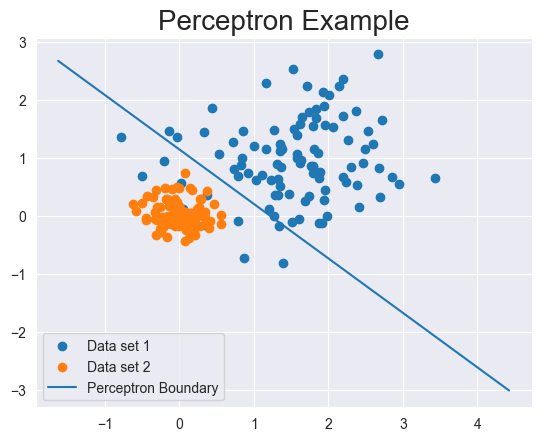

The Error Rate of the Perceptron Model on the data set is 5.5%


In [16]:
#Create random points
X = random_points(100,1.5,1,.75)
Y = random_points(100,0,0,.25)
X0 = [point[0] for point in X]
X1 = [point[1] for point in X]
Y0 = [point[0] for point in Y]
Y1 = [point[1] for point in Y]
XX = [[point[0],point[1],1] for point in X]
YY = [[point[0],point[1],0] for point in Y]
Z=XX+YY


#Train the perceptron model
l_rate = .1
n_epoch = 5
weights, all_weights = train_weights(Z, l_rate, n_epoch)

#Points for plotting perceptron boundary
A = [min(Y0)-1,max(X0)+1]
B = [-weights[1]/weights[2]*point - weights[0]/weights[2] for point in A]


#Find error rate of model
df = pd.DataFrame(Z,columns=['x-value','y-value','Type'])
df['prediction'] = df.apply(lambda row: predict([row['x-value'], row['y-value'], 1], weights), axis=1)
df['error'] = df.apply(lambda row: np.abs(row['Type']-row['prediction']), axis = 1)
mean_error = np.mean(df['error'])


#Plot data set and perceptron boundary
plt.title('Perceptron Example',size='20')
plt.scatter(X0,X1, label = 'Data set 1')
plt.scatter(Y0,Y1, label = 'Data set 2')
plt.plot(A,B,label = 'Perceptron Boundary')
plt.legend()
plt.show()

print(f'The Error Rate of the Perceptron Model on the data set is {100*mean_error}%')

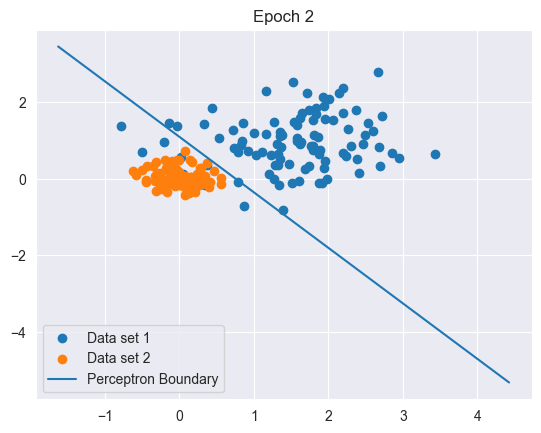

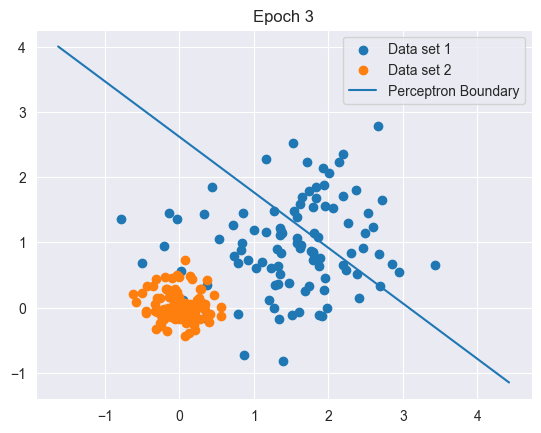

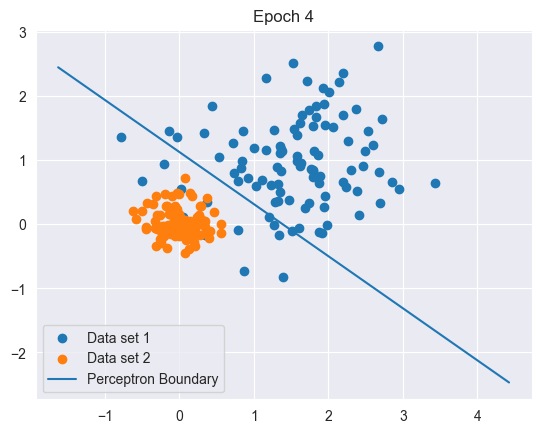

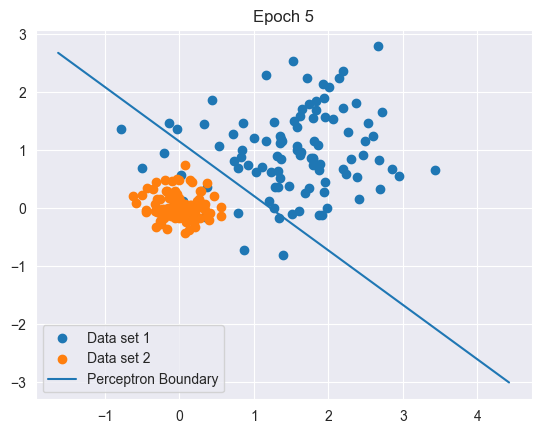

In [17]:
n = 1
for weight in all_weights[1::]:
    A = [min(Y0)-1,max(X0)+1]
    B = [-weight[1]/weight[2]*point - weight[0]/weight[2] for point in A]


    plt.title(f'Epoch {n+1}')
    plt.scatter(X0,X1, label = 'Data set 1')
    plt.scatter(Y0,Y1, label = 'Data set 2')
    plt.plot(A,B,label = 'Perceptron Boundary')
    plt.legend()
    plt.show()
    n+=1

# Using the Perceptron Method on the Iris Dataset

## Introduction

We will apply the Perceptron algorithm to the Iris dataset to classify the data points into two classes. The Iris dataset is a well-known dataset in the field of machine learning and consists of three classes of iris plants: setosa, versicolor, and virginica. For simplicity, we will focus on only two classes: setosa and versicolor.


### Steps for Applying the Perceptron Method:

1. **Data Preparation**:
    - Load the Iris dataset.
    - Filter the dataset to include only the classes setosa (target = 0) and versicolor (target = 1).
    - Split the filtered dataset into training and test sets.

2. **Training the Perceptron**:
    - Use the training set to train the Perceptron model.
    - The Perceptron will learn the weights that minimize the classification error on the training data.

3. **Model Evaluation**:
    - Use the test set to evaluate the performance of the trained Perceptron model.
    - Calculate the error rate of the model on the test data.
    - Perform a chi-squared test to assess the statistical significance of the results.

## Training-Test Split

We will randomly split the filtered Iris dataset into a training set and a test set. The training set will be used to train the Perceptron model, and the test set will be used to evaluate its performance. The training-test split ensures that we can assess how well the model generalizes to new, unseen data.

## Chi-Squared Test

To evaluate the statistical significance of our model's performance, we will use the chi-squared test. This test will help us determine whether the model's predictions are significantly better than random guessing. The chi-squared test will be performed on a contingency table of actual vs. predicted class labels from the test set.

### Steps for the Chi-Squared Test:

1. Create a contingency table of actual vs. predicted class labels from the test set.
2. Perform the chi-squared test using the contingency table.
3. Analyze the p-value to determine the statistical significance of the results.

In [18]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
df['target'] = iris.target

# Filter the DataFrame to include only rows where the target is 0 or 1
df_filtered = df[df['target'].isin([0, 1])]

# Display the 5 random rows of the filtered DataFrame
df_filtered.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
43,5.0,3.5,1.6,0.6,0
50,7.0,3.2,4.7,1.4,1
22,4.6,3.6,1.0,0.2,0
46,5.1,3.8,1.6,0.2,0
58,6.6,2.9,4.6,1.3,1


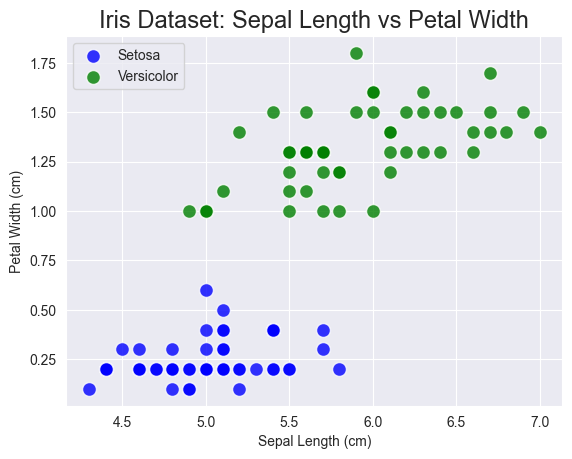

In [19]:
#Create of scatter plot of Setosa and Versicolor Irises 
#with respect to measurements of their Sepal length and Petal width

colors = {0: 'blue', 1: 'green'}
labels = {0: 'Setosa', 1: 'Versicolor'}

fig, ax = plt.subplots()

for target, color in colors.items():
    subset = df_filtered[df_filtered['target'] == target]
    ax.scatter(subset['sepal length (cm)'], subset['petal width (cm)'],
               c=color, label=labels[target], alpha=0.8, edgecolors='w', s=100)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('Iris Dataset: Sepal Length vs Petal Width', size = '17')
ax.legend()
plt.show()

In [43]:
# Split the data into training and test sets
train_set, test_set = train_test_split(df_filtered, test_size=0.5)



# Prepare the training data
train_data = train_set[['sepal length (cm)', 'petal width (cm)', 'target']].to_numpy()

# Prepare the test data
test_data = test_set[['sepal length (cm)', 'petal width (cm)', 'target']].to_numpy()


# Train the Perceptron model on the training data
l_rate = 0.01
n_epoch = 5
weights, all_weights = train_weights(train_data, l_rate, n_epoch)

# Make predictions on the test data
test_predictions = [predict(row, weights) for row in test_data]

# Print the predictions and the actual values
print("\nTest Predictions vs Actual Values:")
for row, prediction in zip(test_data, test_predictions):
    print(f"Predicted: {prediction}, Actual: {row[-1]}")
    
# Calculate error rate
num_errors = sum(1 for i in range(len(test_data)) if test_predictions[i] != test_data[i][-1])
error_rate = num_errors / len(test_data)

print(f"\nError rate: {error_rate:.2f}")

# Perform chi-squared test for statistical significance
actual = [row[-1] for row in test_data]
predicted = test_predictions

# Create a contingency table
contingency_table = pd.crosstab(pd.Series(actual, name='Actual'), pd.Series(predicted, name='Predicted'))

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nContingency Table:")
print(contingency_table)
print(f"\nChi-squared test statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("The result is statistically significant (p < 0.05)")
else:
    print("The result is not statistically significant (p >= 0.05)")

>epoch=0, lrate=0.010, error=19.000
>epoch=1, lrate=0.010, error=11.000
>epoch=2, lrate=0.010, error=0.000
>epoch=3, lrate=0.010, error=0.000
>epoch=4, lrate=0.010, error=0.000

Test Predictions vs Actual Values:
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Pre

## Extending the Perceptron Algorithm for Non-Linear Decision Boundaries

While the basic Perceptron algorithm is limited to linear decision boundaries, it can be extended to handle non-linear decision boundaries by transforming the input features. One common approach is to use polynomial features or other non-linear transformations.

### Circular Decision Boundary

To classify points within a circular region, we need to modify the input features so that the decision boundary is no longer linear. This can be achieved by adding polynomial terms to the input features. For a circular decision boundary, we can add squared terms of the original features.

### Feature Transformation

Suppose our original input features are $x_1$ and $x_2$. To create a circular decision boundary, we can transform these features to include $x_1^2$ and $x_2^2$. The new feature vector will be:

$$ \mathbf{x}' = [x_1, x_2, x_1^2, x_2^2] $$

This transformation allows the Perceptron to learn a quadratic decision boundary, which can represent a circular region.

### Modified Prediction Function

The prediction function needs to be updated to use the transformed features. The activation function will now operate on the transformed feature vector \(\mathbf{x}'\):

$$ \text{activation} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 $$

The prediction is then made based on whether the activation is greater than or equal to zero:

$$ \hat{y} = \begin{cases} 
1 & \text{if } \text{activation} \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

### Modified Learning Algorithm

The learning algorithm remains mostly the same, but it now operates on the transformed feature vector. The weights are updated based on the transformed features:

$$ w_i = w_i + \eta \cdot (y - \hat{y}) \cdot x'_i $$

where $ x'_i $ are the elements of the transformed feature vector $\mathbf{x}'$.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Make a prediction with transformed features
def predict_circular(row, weights):
    """
    Predict the class label for a single row of input data using the given weights
    with feature transformation for circular decision boundaries.
    
    Args:
    row (list or array-like): Input data row.
    weights (list or array-like): Model weights.

    Returns:
    float: Predicted class label (0 or 1).
    """
    x1, x2 = row[0], row[1]
    x1_squared, x2_squared, x1x2 = x1 ** 2, x2 ** 2, x1 * x2
    activation = weights[0] + weights[1] * x1 + weights[2] * x2 + weights[3] * x1x2 + weights[4] * x1_squared + weights[5] * x2_squared
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent with feature transformation
def train_weights_circular(train, l_rate, n_epoch):
    """
    Train the Perceptron weights using stochastic gradient descent with feature transformation
    for circular decision boundaries.
    
    Args:
    train (list of lists or array-like): Training dataset.
    l_rate (float): Learning rate.
    n_epoch (int): Number of training epochs.

    Returns:
    list: Trained weights.
    """
    weights = [0.0 for _ in range(6)]  # Initialize weights for [1, x1, x2, x1x2, x1^2, x2^2]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict_circular(row, weights)
            error = row[-1] - prediction
            sum_error += error ** 2
            weights[0] += l_rate * error
            weights[1] += l_rate * error * row[0]
            weights[2] += l_rate * error * row[1]
            weights[3] += l_rate * error * (row[0] * row[1])
            weights[4] += l_rate * error * (row[0] ** 2)
            weights[5] += l_rate * error * (row[1] ** 2)
        print(f'>epoch={epoch}, lrate={l_rate:.3f}, error={sum_error:.3f}')
    return weights

In [34]:
# Generate some random points in xy-plane, points in the unit circle are labeled 1, points outside are labeled 0
train_data_circular = []
for _ in range(50):
    x1, x2 = np.random.uniform(-2, 2), np.random.uniform(-2, 2)
    label = 1 if x1**2 + x2**2 <= 1 else 0
    train_data_circular.append([x1, x2, label])

# Train the model
l_rate = 0.1
n_epoch = 10
weights_circular = train_weights_circular(train_data_circular, l_rate, n_epoch)

print(weights_circular)

>epoch=0, lrate=0.100, error=7.000
>epoch=1, lrate=0.100, error=3.000
>epoch=2, lrate=0.100, error=3.000
>epoch=3, lrate=0.100, error=1.000
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
[0.4, -0.1107499898163262, 0.02892407559078805, 0.016401817531156923, -0.40579041089174056, -0.41079420837385905]
